<a href="https://colab.research.google.com/github/Jason-Durr/Projects-in-Machine-Learning/blob/main/Project/ProjectModels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [65]:
import pandas as pd


# Generate Model

Read in Feature data generated in the other Notebook

In [542]:
data = pd.read_csv("FinalData.csv")

In [543]:
data['PlayKey'] = data['GameId'].astype(str) + data['PlayId'].astype(str)
print("Number of Plays",data['PlayKey'].unique().shape[0])

Number of Plays 3762


In [544]:
data['TimeKey'] = data['PlayKey'] + "T" +  data['TimeStep'].astype(str)
print("Number of Timesteps",(data["TimeKey"]).unique().shape[0])

Number of Timesteps 171577


Replace any infinity data points with a large number in relation to the feature

In [545]:
data.replace([np.inf],60,inplace=True)
data.replace([-np.inf],-60,inplace=True)

In [323]:
data.head(44)

,GameId,PlayId,TimeStep,Tackler,PlayerId,TimeToIntersect,BlockersBetween,DefendersBetween,Distance,Returner Speed,RDirectionChange,PlayKey,TimeKey
Index,,,,,,,,,,,,,
4513850,2018090600,366,0,0,32361.0,-40.772163,2.621449,2.952808,25.643791,1.38,0.00,2018090600366,2018090600366T0
4514362,2018090600,366,0,0,40408.0,-32.312952,4.716979,5.038463,33.189932,1.38,0.00,2018090600366,2018090600366T0
4514618,2018090600,366,0,0,42515.0,-5.238596,1.662737,1.423614,20.513159,1.38,0.00,2018090600366,2018090600366T0
4514746,2018090600,366,0,0,42942.0,-348.709737,4.543269,4.540150,31.111941,1.38,0.00,2018090600366,2018090600366T0
4514874,2018090600,366,0,0,43442.0,-12.130731,6.636651,7.301948,51.687895,1.38,0.00,2018090600366,2018090600366T0
4515002,2018090600,366,0,1,43497.0,-94.165157,2.923034,3.009127,26.113822,1.38,0.00,2018090600366,2018090600366T0
4515386,2018090600,366,0,0,44979.0,-13.658873,2.644440,2.482334,23.104132,1.38,0.00,2018090600366,2018090600366T0
4515642,2018090600,366,0,0,44997.0,-9.872013,2.366674,2.700362,24.871319,1.38,0.00,2018090600366,2018090600366T0
4515898,2018090600,366,0,0,45599.0,-11.318313,5.951347,6.311647,41.672288,1.38,0.00,2018090600366,2018090600366T0


# First attempted Model

Initially I tried a basic logistic regression to see if there was any merit in predicting if someone made a tackle based on their features at a given timestamp alone.  This resulted in just guessing that no one made a tackle most likely due to both the class imbalance and lack of information from other pottetial tacklers.  As a result I chose to skip trying to better this model and switched to a neural net.

In [53]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow import keras
number_of_classes = 1
number_of_features = 6 #X_train.shape[1]
model = Sequential()
model.add(Dense(number_of_classes,activation = 'sigmoid',input_dim = number_of_features))
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['binary_accuracy'])
#model.fit(x, y, epoch=10, validation_data=(x_val, y_val))

In [60]:
x = data[[ 'TimeToIntersect','BlockersBetween','DefendersBetween','Distance','Returner Speed','RDirectionChange']]

In [61]:
x = (x-x.mean())/x.std()

In [62]:
y = data['Tackler']

In [ ]:
y.count()/y.shape[0]

In [64]:
model.fit(x,y,epochs=100)

Epoch 1/100
13650/13650 [==============================] - 6s 466us/step - loss: nan - binary_accuracy: 0.9123
Epoch 2/100
13650/13650 [==============================] - 6s 463us/step - loss: nan - binary_accuracy: 0.9123
Epoch 3/100
13650/13650 [==============================] - 6s 455us/step - loss: nan - binary_accuracy: 0.9123
Epoch 4/100
13650/13650 [==============================] - 6s 461us/step - loss: nan - binary_accuracy: 0.9123
Epoch 5/100
13650/13650 [==============================] - 6s 464us/step - loss: nan - binary_accuracy: 0.9123
Epoch 6/100
13650/13650 [==============================] - 6s 465us/step - loss: nan - binary_accuracy: 0.9123
Epoch 7/100
13650/13650 [==============================] - 6s 472us/step - loss: nan - binary_accuracy: 0.9123
Epoch 8/100
13650/13650 [==============================] - 6s 466us/step - loss: nan - binary_accuracy: 0.9123
Epoch 9/100
13650/13650 [==============================] - 6s 463us/step - loss: nan - binary_accuracy: 0.9123
E

In [77]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [235]:
model.summary()

Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 1, 1, 33)          2211      
_________________________________________________________________
flatten_6 (Flatten)          (None, 33)                0         
_________________________________________________________________
dense_19 (Dense)             (None, 128)               4352      
_________________________________________________________________
dense_20 (Dense)             (None, 11)                1419      
Total params: 7,982
Trainable params: 7,982
Non-trainable params: 0
_________________________________________________________________


# Process Data to prepare for CNN

Convert the data to matricies for each timestep, this requires organizing by timestep key.

In [546]:
x = data[[ 'TimeToIntersect','BlockersBetween','DefendersBetween','Distance','Returner Speed','RDirectionChange','TimeKey']]

In [ ]:
import numpy as np
import time

D = []
start = time.time()
count = 0
for key in x.TimeKey.unique():
  D.append(np.asmatrix(x.query("TimeKey == @key"))[:,:6])
  if count %1000 == 0:
    print((time.time()-start))
    print(x.shape[0]*(time.time()-start)/(count+1))
    print(count)
  count +=1
  # break


In [220]:
len(D)

39709

In [221]:
D[0].shape

(11, 6)

In [328]:
D_Final = np.empty((len(D),11,6))

In [329]:
for i in range(len(D)):
  D_Final[i] = D[i]

## Convert Y to onehot encoder for each timestep

In [163]:
Y_matrices = data[['Tackler','TimeKey']]

In [ ]:
Y_final =  np.empty((len(D),11,1))
start = time.time()
count = 0
for key in x.TimeKey.unique():
  Y_final[count] = np.asmatrix(Y_matrices.query("TimeKey == @key"))[:,:1]
  # D.append(np.asmatrix(Y_matrices.query("TimeKey == @key"))[:,:6])
  count +=1
  # break

In [ ]:
Y_final

In [330]:
D_Final= (D_Final-np.asarray(data[[ 'TimeToIntersect','BlockersBetween','DefendersBetween','Distance','Returner Speed','RDirectionChange']].mean()))/np.asarray(data[[ 'TimeToIntersect','BlockersBetween','DefendersBetween','Distance','Returner Speed','RDirectionChange']].std())

In [380]:
D_Final = np.nan_to_num(D_Final).transpose(0,2,1)
Y_final = Y_final.reshape(Y_final.shape[0],11)

## Calculate Weights for each data point as the timestep over the length of the play squared.

In [476]:
PlayLength = {}
for key in data['PlayKey'].unique():
  PlayLength[key] = data['TimeStep'].loc[data.query("PlayKey == @key").last_valid_index()]


In [511]:
maxes = data['TimeKey'].drop_duplicates().apply(lambda x: PlayLength[x.split("T")[0]])
weights = np.exp((data[['TimeStep','TimeKey']].drop_duplicates()['TimeStep']+1)/maxes)

## Create train and validation data split


In [512]:
dtrain = D_Final[:-10000]
ytrain = Y_final[:-10000]
dval = D_Final[-10000:]
yval = Y_final[-10000:]
trainweights = weights[:-10000]
testweights = weights[-10000:]

## Define CNN model

In [539]:
model = models.Sequential()
model.add(layers.Conv1D(11,(6),activation='relu',input_shape=(6,11)))
model.add(layers.Flatten())
# model.add(layers.Dense(11))
model.add(layers.Dense(11,activation='sigmoid'))
model.compile(loss='categorical_crossentropy',optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001, beta_1=0.95, beta_2=0.999, epsilon=1e-07, amsgrad=False,
    name='Adam'
),metrics=['accuracy'],)


In [533]:
model.summary()

Model: "sequential_73"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_40 (Conv1D)           (None, 1, 11)             737       
_________________________________________________________________
flatten_46 (Flatten)         (None, 11)                0         
_________________________________________________________________
dense_77 (Dense)             (None, 11)                132       
Total params: 869
Trainable params: 869
Non-trainable params: 0
_________________________________________________________________


In [558]:
model.predict(D_Final)[5]


array([0.15751326, 0.1463919 , 0.18501422, 0.17336687, 0.19347125,
       0.14209035, 0.13222447, 0.17490697, 0.16037387, 0.13091004,
       0.1379435 ], dtype=float32)

## Fit Model

In [550]:
history = model.fit(dtrain, ytrain,validation_data=(dval,yval), epochs=200,workers=-1,sample_weight=trainweights)

Epoch 1/200
929/929 [==============================] - 1s 910us/step - loss: 4.1196 - accuracy: 0.1104 - val_loss: 2.3724 - val_accuracy: 0.1017
Epoch 2/200
929/929 [==============================] - 1s 778us/step - loss: 3.8982 - accuracy: 0.1602 - val_loss: 2.3105 - val_accuracy: 0.1345
Epoch 3/200
929/929 [==============================] - 1s 790us/step - loss: 3.7823 - accuracy: 0.1897 - val_loss: 2.2592 - val_accuracy: 0.1487
Epoch 4/200
929/929 [==============================] - 1s 790us/step - loss: 3.6549 - accuracy: 0.2092 - val_loss: 2.2225 - val_accuracy: 0.1665
Epoch 5/200
929/929 [==============================] - 1s 794us/step - loss: 3.5572 - accuracy: 0.2220 - val_loss: 2.1966 - val_accuracy: 0.1821
Epoch 6/200
929/929 [==============================] - 1s 791us/step - loss: 3.4848 - accuracy: 0.2357 - val_loss: 2.1788 - val_accuracy: 0.1887
Epoch 7/200
929/929 [==============================] - 1s 790us/step - loss: 3.4568 - accuracy: 0.2400 - val_loss: 2.1690 - val_ac

## Find the best accuracies and loss

In [536]:
max(history.history['val_accuracy'])

0.2409999966621399

In [537]:
min(history.history['loss'])

3.014948606491089

In [538]:
max(history.history['accuracy'])

0.3143828511238098

# Result

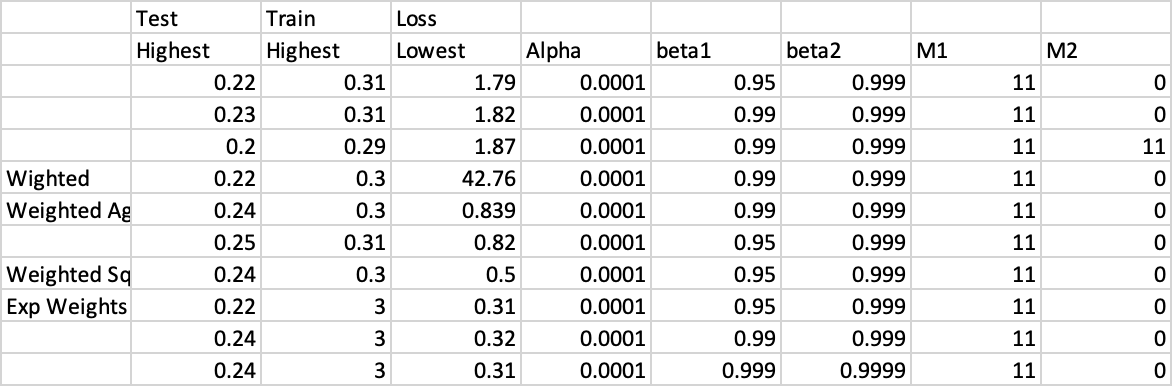



  The first step in the process was generating the features out of the raw data.  For these I chose to do 6 variables for the initial set up.  The first being the speed of the returner at a given time step in order to include how elusice the returner might be at a given moment. Next was the euclidean distance between a potential tackler and the returner, the farther away the returner is the less likely a tackle will be made. After that was the number of blockers and the number of other defenders between a pottential tackler and the returner.  To calculate this I used the angle formed by the kicking player, person in between, reciever divided by 180 so someone exactly in between would be 1 person in between and as they get farther from being inbetween the value decreases. The idea behind these was that a blocker would impeed the ability to make a tackle and another kicking player in between would be likely to make a tackle before this player could get there. The next feature was the change in direction of the returner's movement from the last timestep to this one. Here, if the returner suddenly changes direction then they might be on the way to being tackled or cutting and missing a tackler.  Lastly was the 'TimeToIntersect', this was calculated by first finding the intersection point between the directions the kicking player and reciever were going and then using their current speed finding the difference in the amount of time it would take for them to reach this point.  The idea behind this is a player is more likely to make a tackle if they are on a collision path with a returner.


  It then took some time to calculate the features for each timestep and even after that the amount that could be practivally used was only about 1/4 of the data do to the increased time needed to maneuver all that data.  When converting the data, I also only looked at times between when the reciever caught the ball and when the tackle was recorded as being made so a to avoid datapoints where the kicking team is not actively trying to make a tackle.


  After this it took some data cleansing to convert nans, inf and -inf to number so that loss and gradient calculations would be successfull. As well as normalizing the data by giving it a mean of 0 and an std of 1.  This works well to make sure the data fits within a range that gradient descent works well in.


  The first model I tried after all of this was a basic Logistic Regression on each player at a given timestamp and prediciting if they were the tackler. This produced results no different than guessing no one made a tackle every time.  The main reason for this is that when the problem is formatted this way there is a class imbalance as on a given play and therefore at a given timestamp 10 out of the 11 players do not make a tackler.  However,  I felt it was not worth trying to solve this by using the class balancing techniques because of the other issue with this set up which was the lack of information on the other kicking players on a play.  In reality the probability of one tackler making a play is dependant on the other tacklers andas such they should be included.


  This led me to trying a CNN with a 6x1 mask for each player and producing 3 noded per player. I tried then both having a 11 node dense layer and leaving it out before a final 11 node denselayer that used the sigmoid function to produce probabilities. This led to ok results as shown in the hyperparameter tuning table above.  The main tweaks that I then tried with this model was coming up with a system for weighting the data points differently so that it would try harder to learn the point closer to the end of the play as these are more likely to include information.  I went through three iterations of calculating these weights.  First I just used the timestamp but this did not take into account that some plays are longer than others.  So then next I tried normalizing these weights by the length of the full play.  This worked better but I felt there could be more sepperation between the points at the end of the play weights and the points at the begining so I then tried squaring and finally settled on exponentiating the weights.  This then led me to be able to achieve a best in sample accuracy of 32% and a best validation accuracy of 25%.  These are better than random of about 9-10% but still not great.

  If I was to continue my next steps would be first to try using all the data instead of just a small subset.  Second I would want to construct more features as I feel I am still not capturing all the information by limiting myself to this few feature. Similarly I would consider trying ratio features as well that compare the created features against the mean and std of a timestep to get a more direct comparison. I would also want to explore using a RNN architecture mixed with the CNN to evaluate entire plays at a time and take information from one time step into the next.